In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import eigh
import pandas as pd

In [231]:
# Parameters
a = 1.42  # carbon-carbon distance in angstroms
t = 2.8  # hopping parameter in eV

# Real-space lattice vectors
a1 = a/2*np.array([1, np.sqrt(3)])
a2 = a/2*np.array([-1, np.sqrt(3)])
d = a/np.sqrt(3)
tauA = np.array([0, 0])
tauB = np.array([0, d])

def f(k):
    return np.exp(1j*np.dot(k,(tauB-tauA)))*(1+np.exp(-1j*np.dot(k,a1))+np.exp(-1j*np.dot(k,a2)))

def H_mono(k):
    fk = f(k)
    H = -t*np.array([[0, fk], [np.conjugate(fk), 0]])
    return H

In [ ]:
def hexagonal_bz_grid(n_k=50):
    kx = np.linspace(-4 * np.pi / (3 * a), 4 * np.pi / (3 * a), n_k)
    ky = np.linspace(-4 * np.pi / (3 * a), 4 * np.pi / (3 * a), n_k)
    kx_grid, ky_grid = np.meshgrid(kx, ky)
    
    mask = (np.abs(kx_grid) <= 4 * np.pi / (3 * a)) & (np.abs(ky_grid) <= 4 * np.pi / (3 * a))
    mask &= (np.abs(ky_grid + np.sqrt(3) * kx_grid) <= 4 * np.pi / (np.sqrt(3) * a))
    mask &= (np.abs(ky_grid - np.sqrt(3) * kx_grid) <= 4 * np.pi / (np.sqrt(3) * a))
    mask &= (np.abs(ky_grid) <= 2 * np.pi / np.sqrt(3) / a)
    
    kx_hex = kx_grid[mask]
    ky_hex = ky_grid[mask]
    return kx_hex, ky_hex

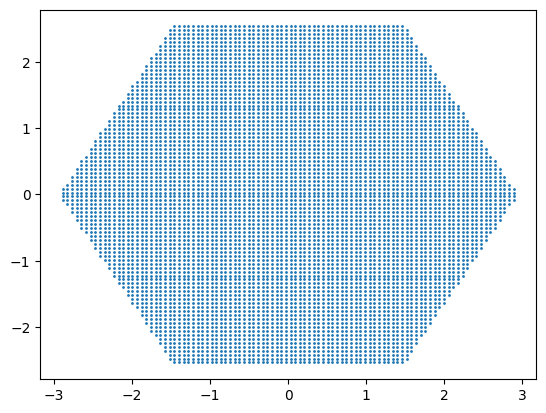

In [233]:
plt.scatter(hexagonal_bz_grid(100)[0], hexagonal_bz_grid(100)[1], s=1)

In [252]:
def plot_bands_3d(kx, ky, bands):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(2):
        ax.plot_trisurf(kx, ky, bands[:, i], cmap='viridis', alpha=0.8)
    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
    ax.set_zlabel('Energy')
    ax.view_init(elev=10, azim=45)  # elev를 낮은 값으로 설정 (기본값은 보통 30~40)
    ax.set_xticks([-np.pi, 0, np.pi])
    ax.set_yticks([-np.pi, 0, np.pi])
    ax.set_xticklabels(['-$\pi$', 0, '$\pi$'])
    ax.set_yticklabels(['-$\pi$', 0, '$\pi$'])
    plt.show()

In [235]:
def eigsolv(kx, ky, H):
    evecs = []
    evals = []
    for i in range(len(kx)):
        eval, evec = eigh(H([kx[i],ky[i]]))
        evals.append(eval)
        evecs.append(evec)
    return np.array(evals), np.array(evecs)

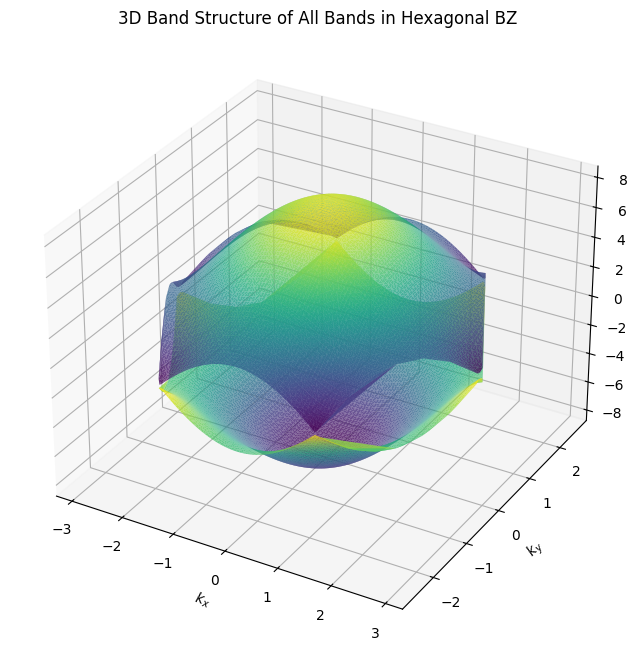

In [236]:
Size = 100
kx_hex, ky_hex = hexagonal_bz_grid(Size)
bands, _ = eigsolv(kx_hex, ky_hex, H_mono)
plot_bands_3d(kx_hex, ky_hex, bands)

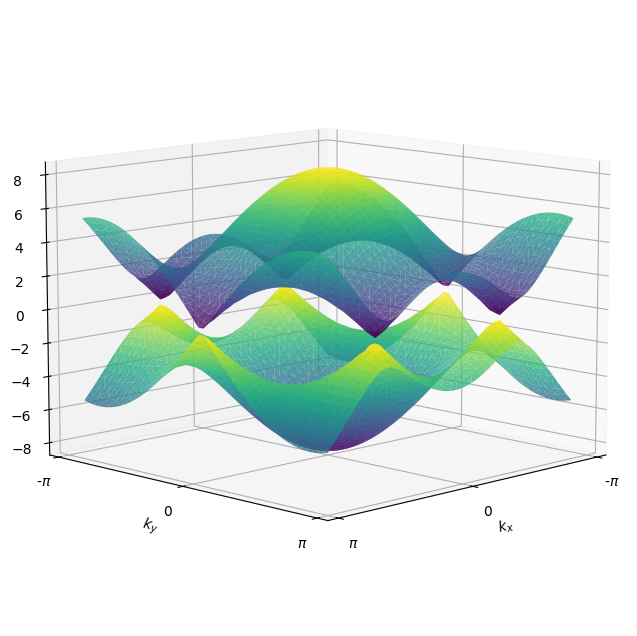

In [253]:
Size = 50
kx = np.linspace(-4 * np.pi / (3 * a), 4 * np.pi / (3 * a), Size)
ky = np.linspace(-4 * np.pi / (3 * a), 4 * np.pi / (3 * a), Size)
kx_grid, ky_grid = np.meshgrid(kx, ky)

mask = (np.abs(kx_grid) <= 4 * np.pi / (3 * a)) & (np.abs(ky_grid) <= 4 * np.pi / (3 * a))

kx_sq = kx_grid[mask]
ky_sq = ky_grid[mask]

bands, _ = eigsolv(kx_sq, ky_sq, H_mono)
plot_bands_3d(kx_sq, ky_sq, bands)